170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3232 - loss: 1.8491 - val_accuracy: 0.5825 - val_loss: 1.1868
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5564 - loss: 1.2543 - val_accuracy: 0.5999 - val_loss: 1.1397
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6380 - loss: 1.0423 - val_accuracy: 0.6797 - val_loss: 0.9302
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6963 - loss: 0.8838 - val_accuracy: 0.7104 - val_loss: 0.8256
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7315 - loss: 0.7884 - val_accuracy: 0.7089 - val_loss: 0.8572
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7594 - loss: 0.7035 - val_accuracy: 0.7303 - val_loss: 0.7680
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7866 - loss: 0.6369 - val_accuracy: 0.7324 - val_loss: 0.7821
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8062 - loss: 0.5695 -

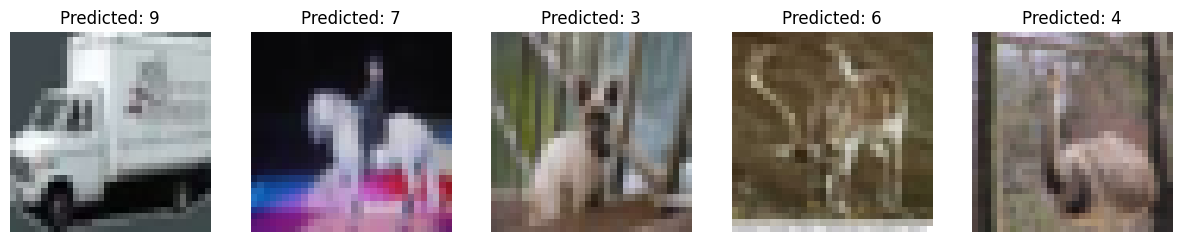

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load dataset directly from Keras
dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

# Normalize data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN Model
def build_cnn(filters=32, kernel_size=(3, 3), learning_rate=0.001):
    model = keras.Sequential([
        layers.Conv2D(filters, kernel_size, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(filters * 2, kernel_size, activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(filters * 4, kernel_size, activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train CNN with different configurations
model = build_cnn(filters=64, kernel_size=(3,3), learning_rate=0.0005)

history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=15,
    batch_size=32
)

# Evaluate Model
loss, acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {acc*100:.2f}%")

# Test Predictions
import random
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
indices = random.sample(range(len(test_images)), 5)

for i, idx in enumerate(indices):
    img = test_images[idx]
    prediction = model.predict(np.expand_dims(img, axis=0))
    class_label = np.argmax(prediction)
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {class_label}")
    axes[i].axis('off')

plt.show()
